In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install eli5

  Created wheel for tabulate: filename=tabulate-0.8.3-cp37-none-any.whl size=23384 sha256=7e4753955536236a71b85b801e009bfc634802ae30dbcabab29bfb5b86d5c555
  Stored in directory: C:\Users\hp\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pdpbox

  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690735 sha256=2cc18e2e34d261e325f43cbc3a0e77aba466f69544277c7a5bd2e15d4891be23
  Stored in directory: C:\Users\hp\AppData\Local\pip\Cache\wheels\7d\08\51\63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install scikitplot

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [25]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve


from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

import os

random_state=42
np.random.seed(random_state)

In [18]:
pwd

'C:\\Users\\hp'

In [19]:
#Set working directory
import os
os.chdir("C:\\Users\\hp")

In [21]:
#Check current working directory
os.getcwd()

'C:\\Users\\hp'

In [29]:
#importing the train dataset
train_df=pd.read_csv('train.csv')
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [30]:
#Shape of the train dataset
train_df.shape

(200000, 202)

In [31]:
#Summary of the dataset
train_df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64
Wall time: 28.7 s
Parser   : 457 ms


Text(0, 0.5, 'Index')

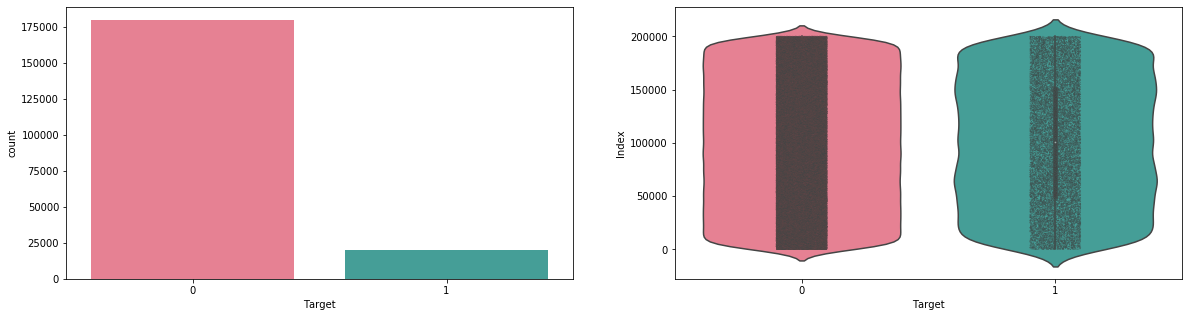

In [32]:
%%time
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)

#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(train_df.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=train_df.target.values,y=train_df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=train_df.target.values,y=train_df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')










                                     
                                     
                                    < Let us look distribution of train attributes>








In [33]:
%%time
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns
Parser   : 106 ms


<Figure size 432x288 with 0 Axes>

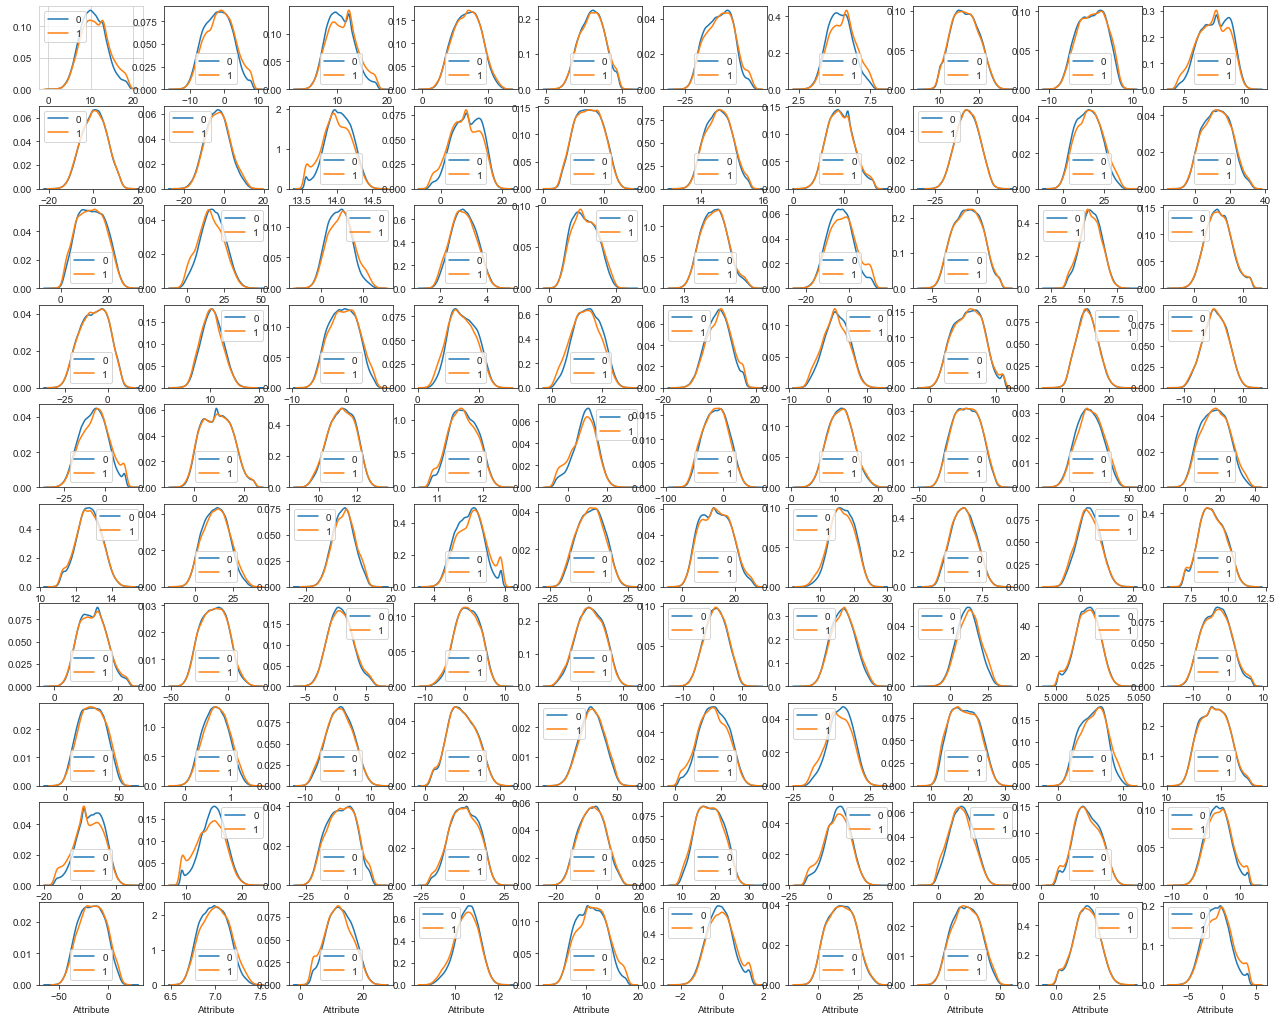

Wall time: 1min 6s


In [35]:
%%time
#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

                 Let us see next 100 train attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

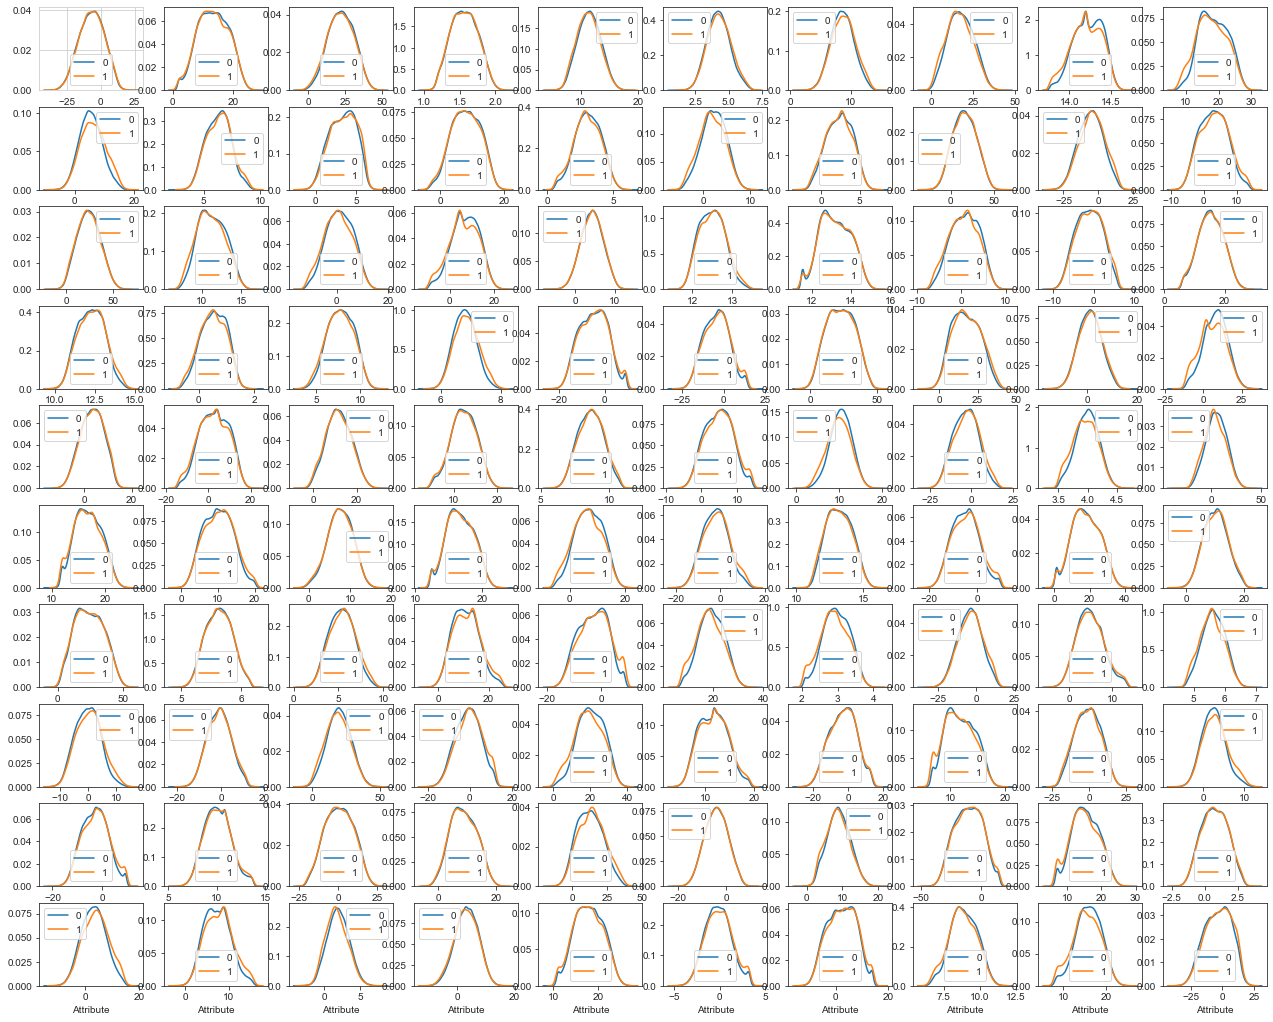

Wall time: 35.9 s


In [36]:
%%time
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)


                                          Importing the test dataset

In [37]:
#importing the test dataset
test_df=pd.read_csv('test.csv')
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [38]:
#Shape of the test dataset
test_df.shape

(200000, 201)

                                       Let us look distribution of test attributes

In [39]:
%%time
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


                                  Let us see first 100 test attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

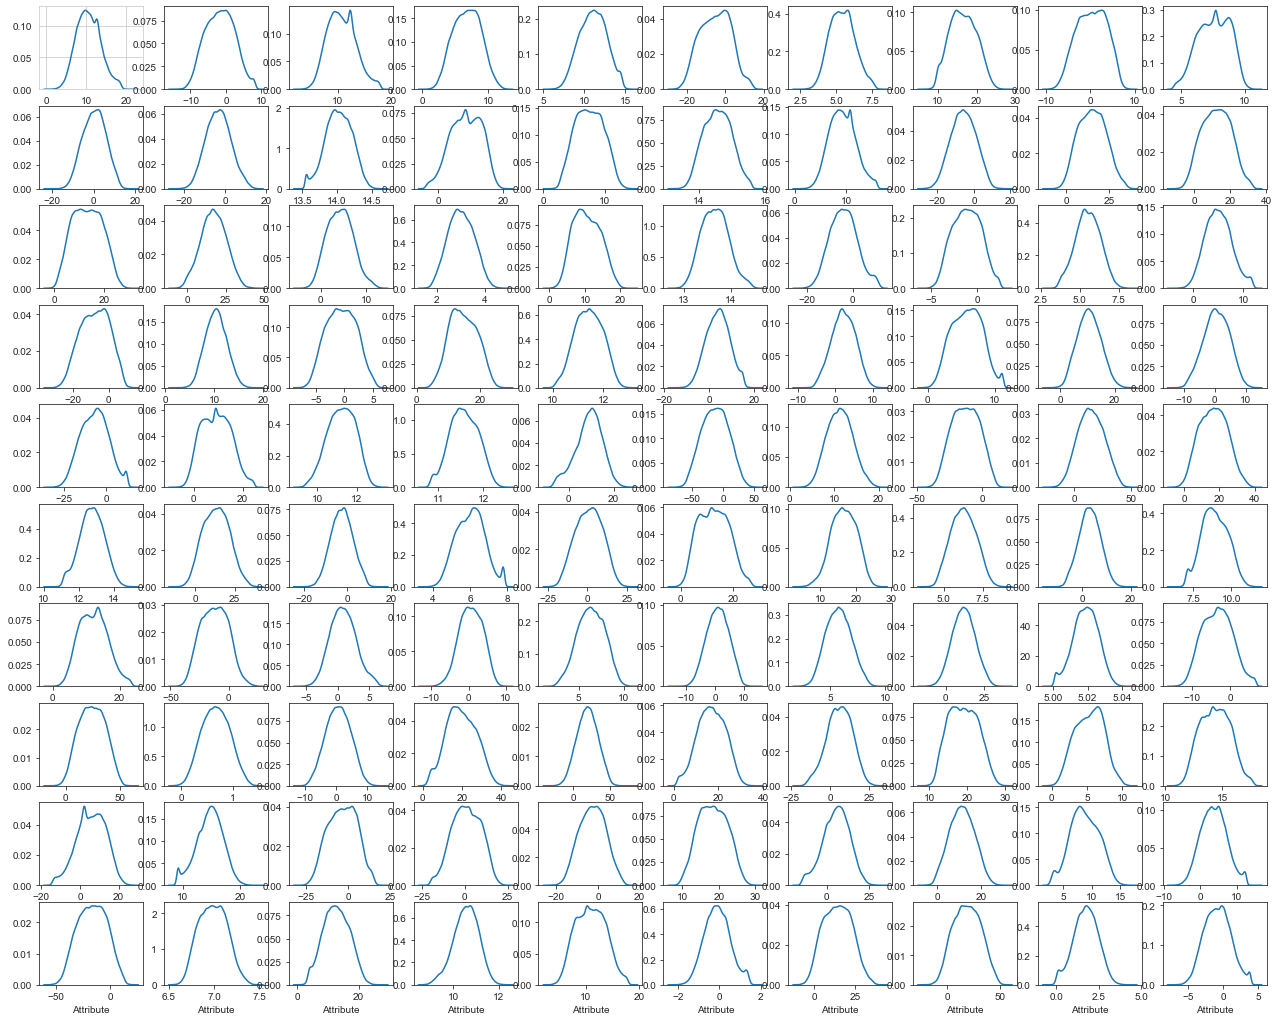

Wall time: 33.9 s


In [40]:
%%time
#test attribiutes from 1 to 101
test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

                                   Let us see next 100 test attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

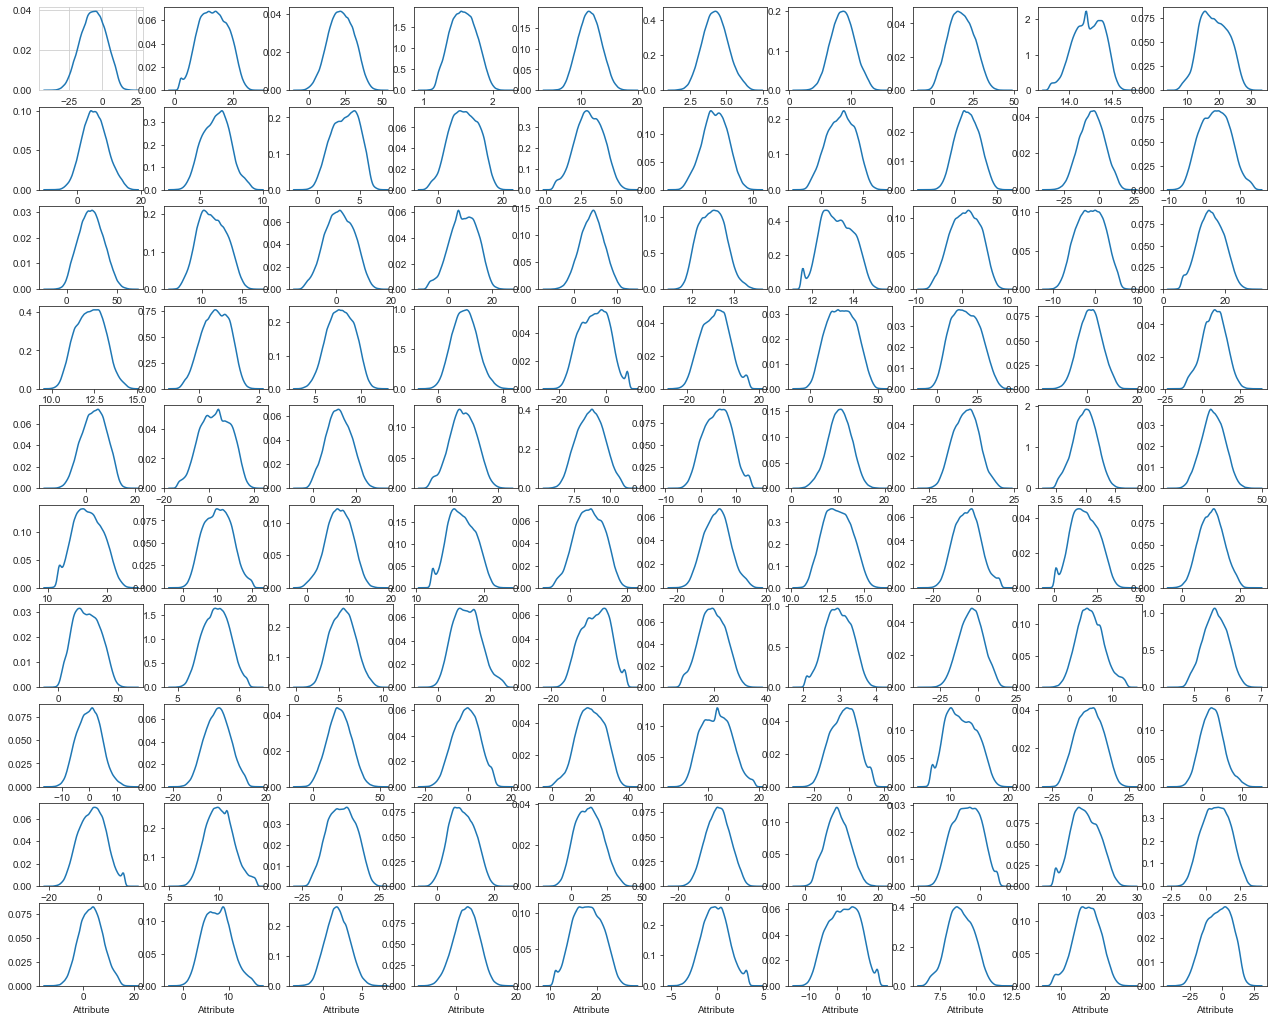

Wall time: 31.6 s


In [41]:
%%time
#test attributes from 101 to 202
test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

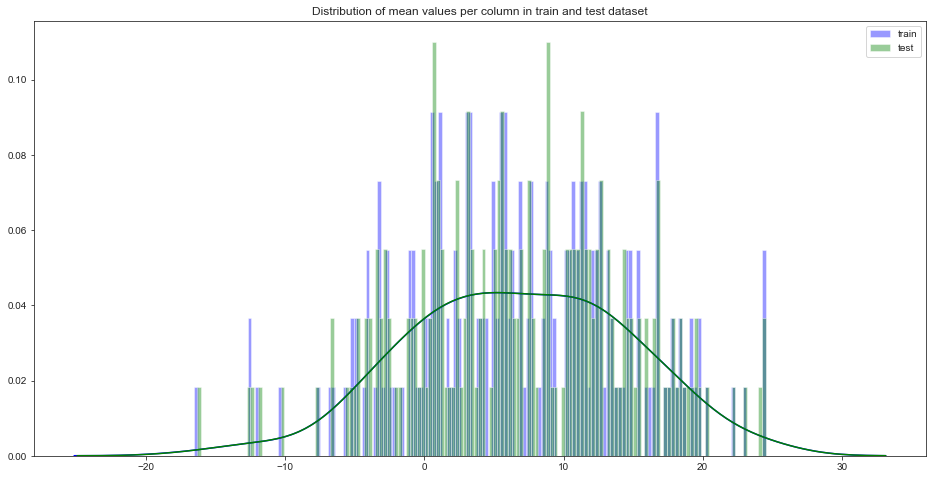

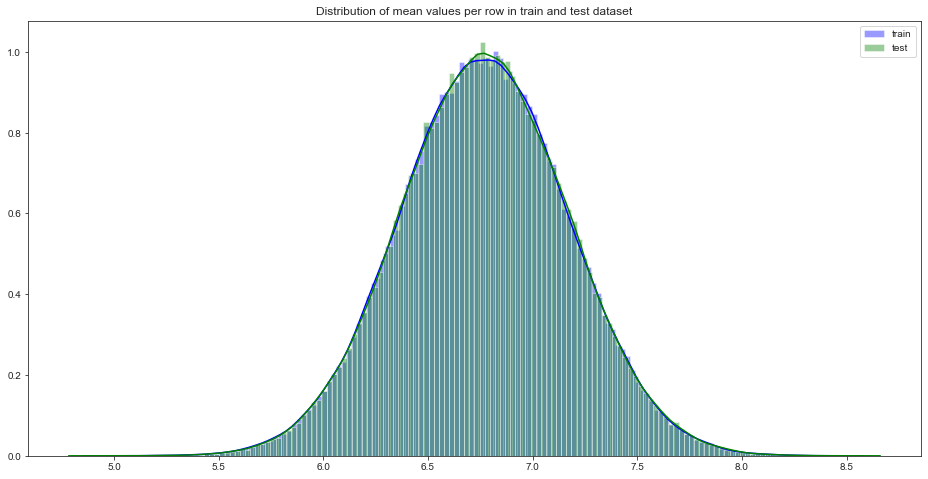

Wall time: 17.2 s


In [42]:
%%time
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()

             Let us look distribution of standard deviation(std) values per rows and columns in train and test dataset

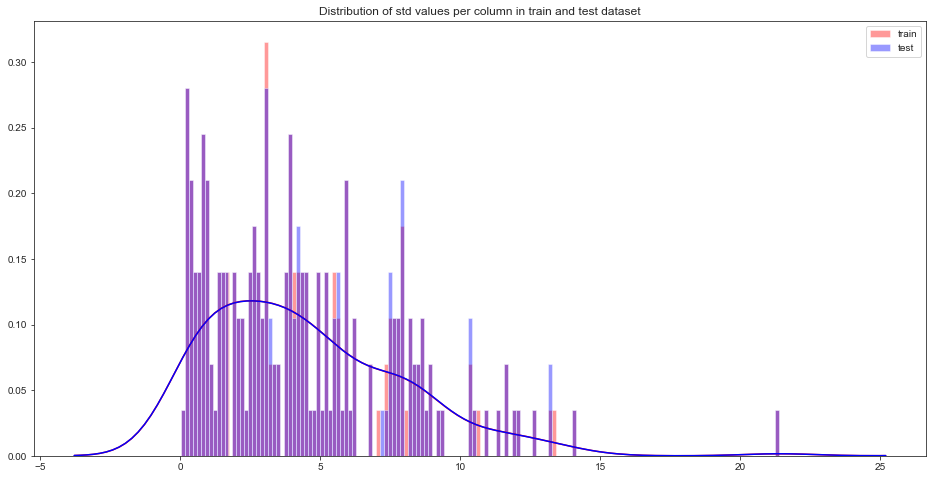

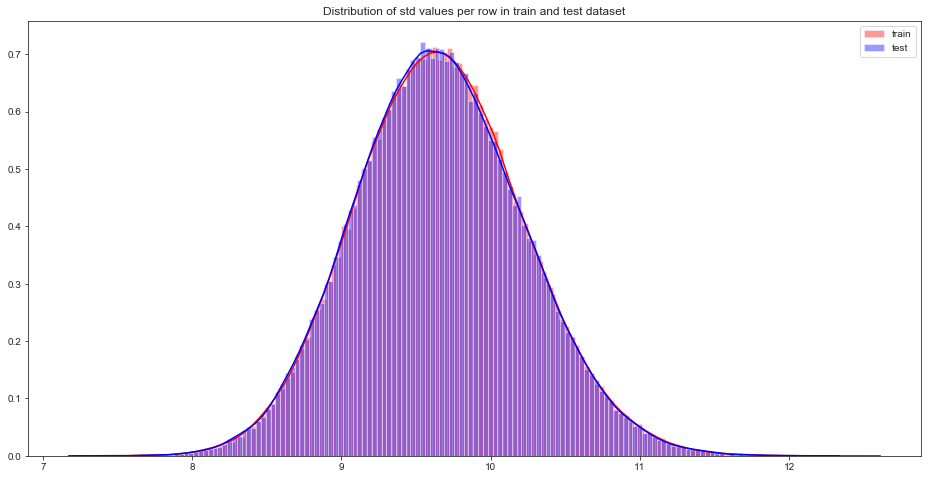

Wall time: 7.88 s


In [43]:
%%time
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

         Let us look distribution of skewness per rows and columns in train and test dataset



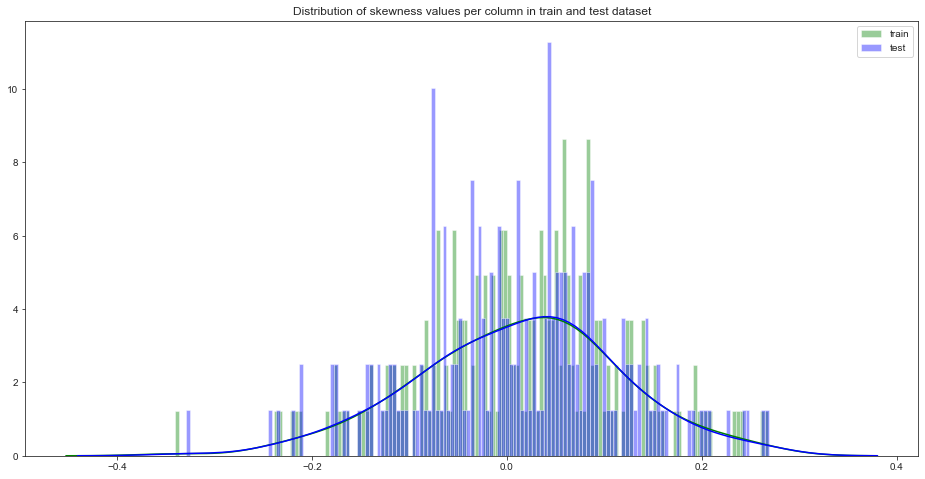

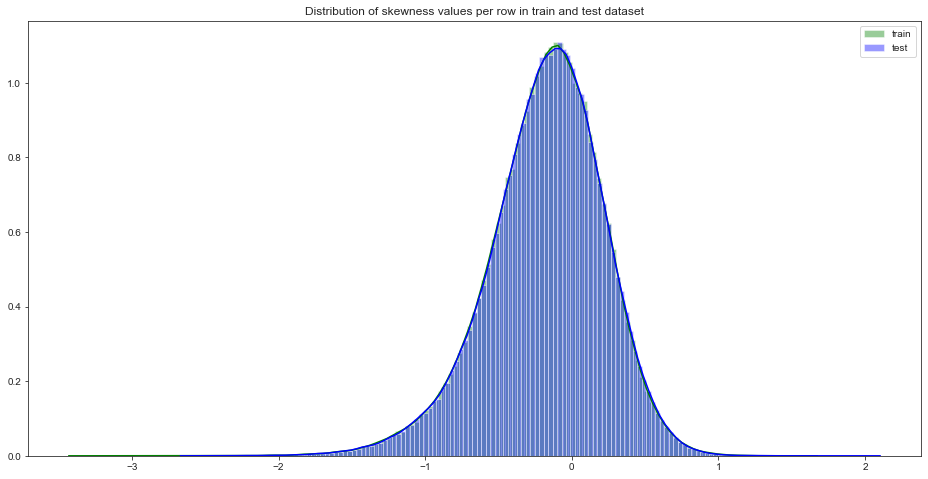

Wall time: 2min 38s


In [44]:
%%time
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

     Let us look distribution of kurtosis values per rows and columns in train and test dataset



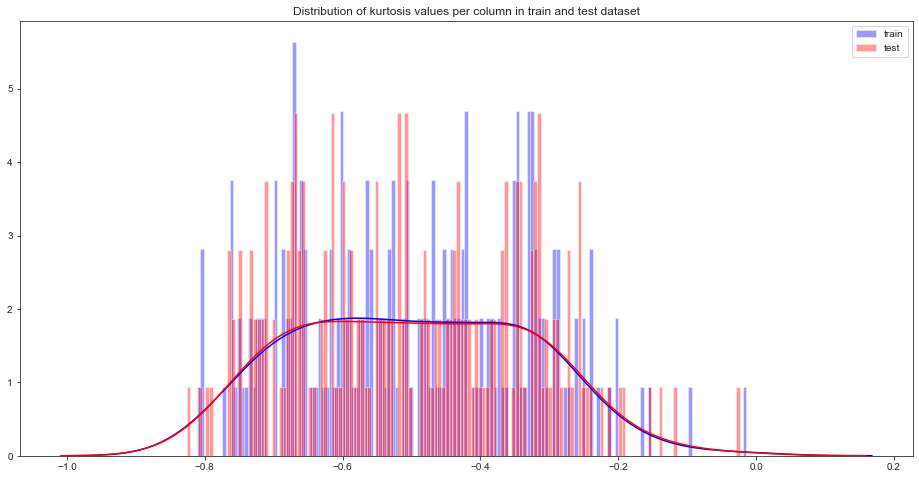

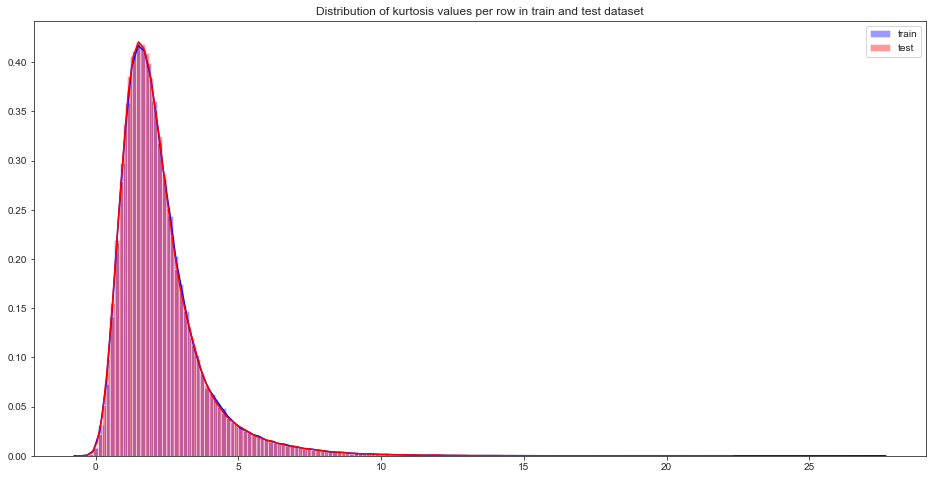

Wall time: 2min 20s
Parser   : 106 ms


In [45]:
%%time
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

                                                 Missing value analysis

In [46]:
%%time
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0
Wall time: 6.04 s


                                              < Correlation between the attributes >

In [47]:
%%time
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
Wall time: 36.7 s


In [48]:
%%time
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
Wall time: 35.4 s


                                        < Correlation plot for train and test data >

Wall time: 1min 12s


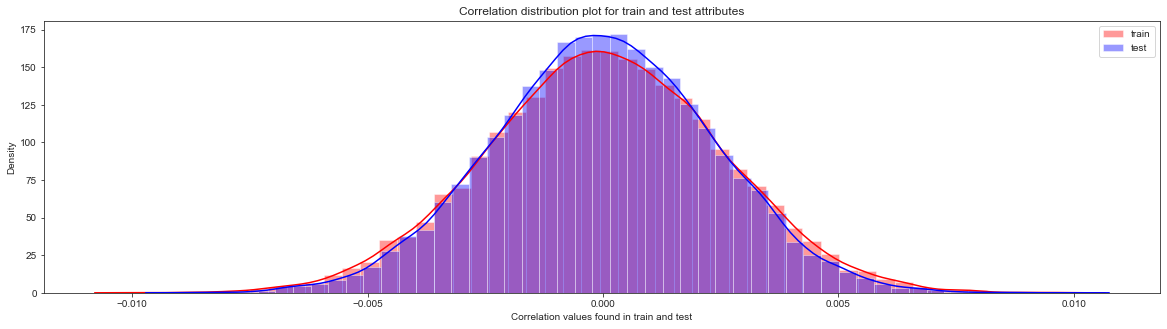

In [49]:
%%time
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

In [50]:
#training and testing data
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

In [51]:
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


In [52]:
%%time
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

Wall time: 2min 38s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

                               <<Let us calculate weights and show important features using eli5 library.>>

In [53]:
%%time
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)

Wall time: 9min 50s


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                      

In [54]:
%%time
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

Wall time: 8.34 s


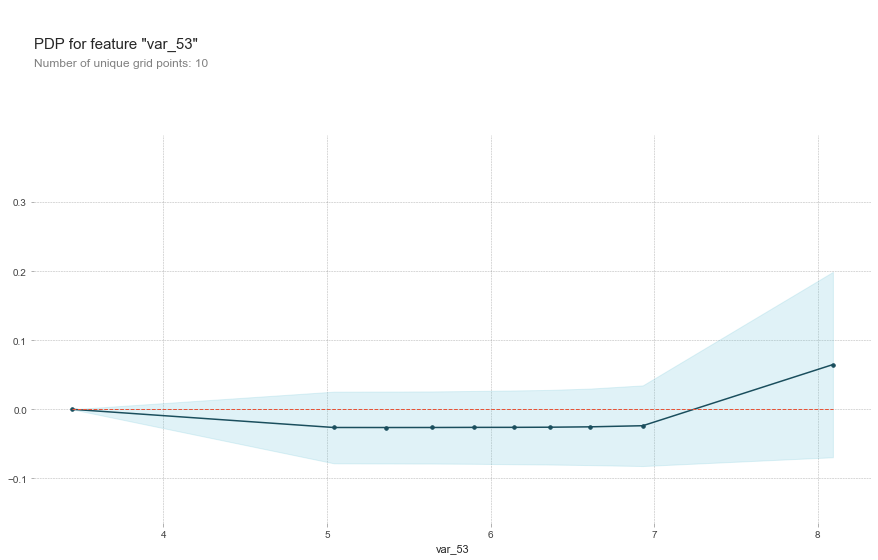

Wall time: 21.7 s


In [55]:
%%time
#Create the data we will plot 'var_53'
features=[v for v in X_valid.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

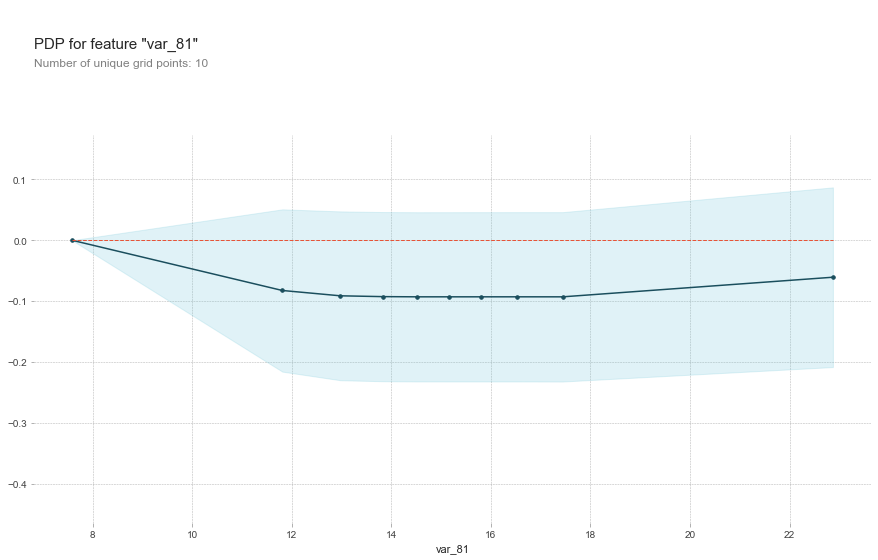

Wall time: 11.7 s


In [56]:
%%time
#Create the data we will plot 'var_81'
features=[v for v in X_valid.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_81')
#plot feature "var_81"
pdp.pdp_plot(pdp_data,'var_81')
plt.show()

                         <<Logistic Regression model>>

In [57]:
%%time
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

Wall time: 5min 41s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

                                  <<Accuracy of model>>

In [58]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the lr_model :',lr_score)

Accuracy of the lr_model : 0.9151066666666666


In [59]:
%%time
#Cross validation prediction
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9122199999999999
Wall time: 11min 12s


                                        <<Confusion matrix>>

In [67]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\Anaconda3

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_0         148 KB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    matplotlib-base-3.1.1      |   py37h2852a4a_1         6.6 MB  conda-forge
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.8 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/win-64::matplotlib-base-3.1.1-py37h2852a4a_1
  scikit-plot        conda-forge/noarch::scikit-plot-0.3.7-py_1

The following packages will be UPDATED:

  conda                      



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\hp\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


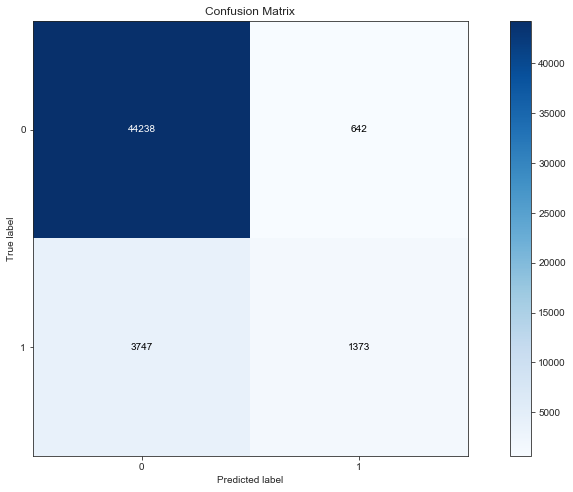

In [70]:
#Confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_valid,cv_predict,normalize=False,figsize=(15,8))

                     <<Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve>>

ROC score : 0.6269296248328876


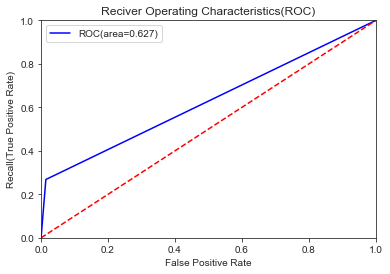

AUC: 0.6269296248328876


In [71]:
#ROC_AUC score
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [72]:
#Classification report
scores=classification_report(y_valid,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44880
           1       0.68      0.27      0.38      5120

    accuracy                           0.91     50000
   macro avg       0.80      0.63      0.67     50000
weighted avg       0.90      0.91      0.89     50000



                                <<Model performance on test data>>

In [73]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
Wall time: 29.1 s


                      <<Synthetic Minority Oversampling Technique(SMOTE)>>

In [74]:
%%time
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42, ratio=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

Wall time: 4min 36s


In [75]:
%%time
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

Wall time: 21min 30s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

                                           <<<Accuracy of model>>>

In [76]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7997178237620536


                           <<<Cross validation prediction of smoth_model>>>

In [77]:
%%time
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7960450089126561
Wall time: 25min 11s
Parser   : 212 ms


                             <<Confusion matrix>>

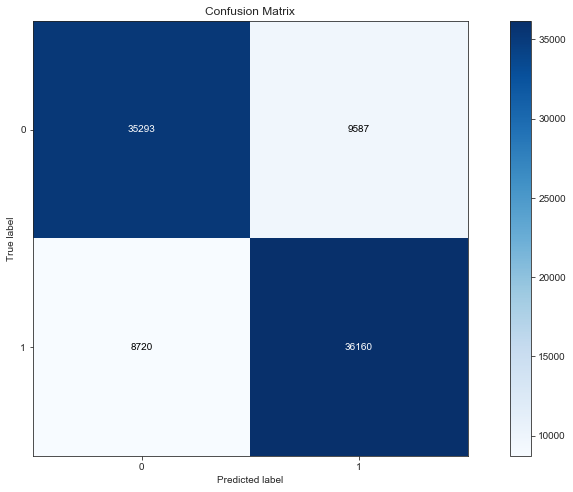

In [78]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_pred,normalize=False,figsize=(15,8))

                  <<Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve>>

ROC score : 0.796045008912656


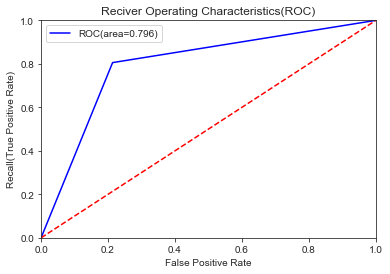

AUC: 0.796045008912656


In [79]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [80]:
#Classification report
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     44880
           1       0.79      0.81      0.80     44880

    accuracy                           0.80     89760
   macro avg       0.80      0.80      0.80     89760
weighted avg       0.80      0.80      0.80     89760



                                   <<Model performance on test data>>

In [81]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
Wall time: 42.4 s


                    <<Let us build LightGBM model>>

In [83]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [84]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

                                 <<Training the lgbm model>>

In [85]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds.
[1000]	training's auc: 0.94228	valid_1's auc: 0.885408
[2000]	training's auc: 0.961604	valid_1's auc: 0.88993
[3000]	training's auc: 0.974882	valid_1's auc: 0.891252
[4000]	training's auc: 0.984071	valid_1's auc: 0.891977
[5000]	training's auc: 0.990289	valid_1's auc: 0.892238
[6000]	training's auc: 0.994317	valid_1's auc: 0.891992
[7000]	training's auc: 0.996835	valid_1's auc: 0.891797
[8000]	training's auc: 0.998319	valid_1's auc: 0.891618
[9000]	training's auc: 0.999154	valid_1's auc: 0.891469
[10000]	training's auc: 0.999607	valid_1's auc: 0.891132
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.999607	valid_1's auc: 0.891132


                               <<lgbm model performance on test data>>

In [86]:
X_test=test_df.drop(['ID_code'],axis=1)
#predict the model
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.27201686 0.44877589 0.16578075 ... 0.00668782 0.12146928 0.20058827]
[0 0 0 ... 0 0 0]


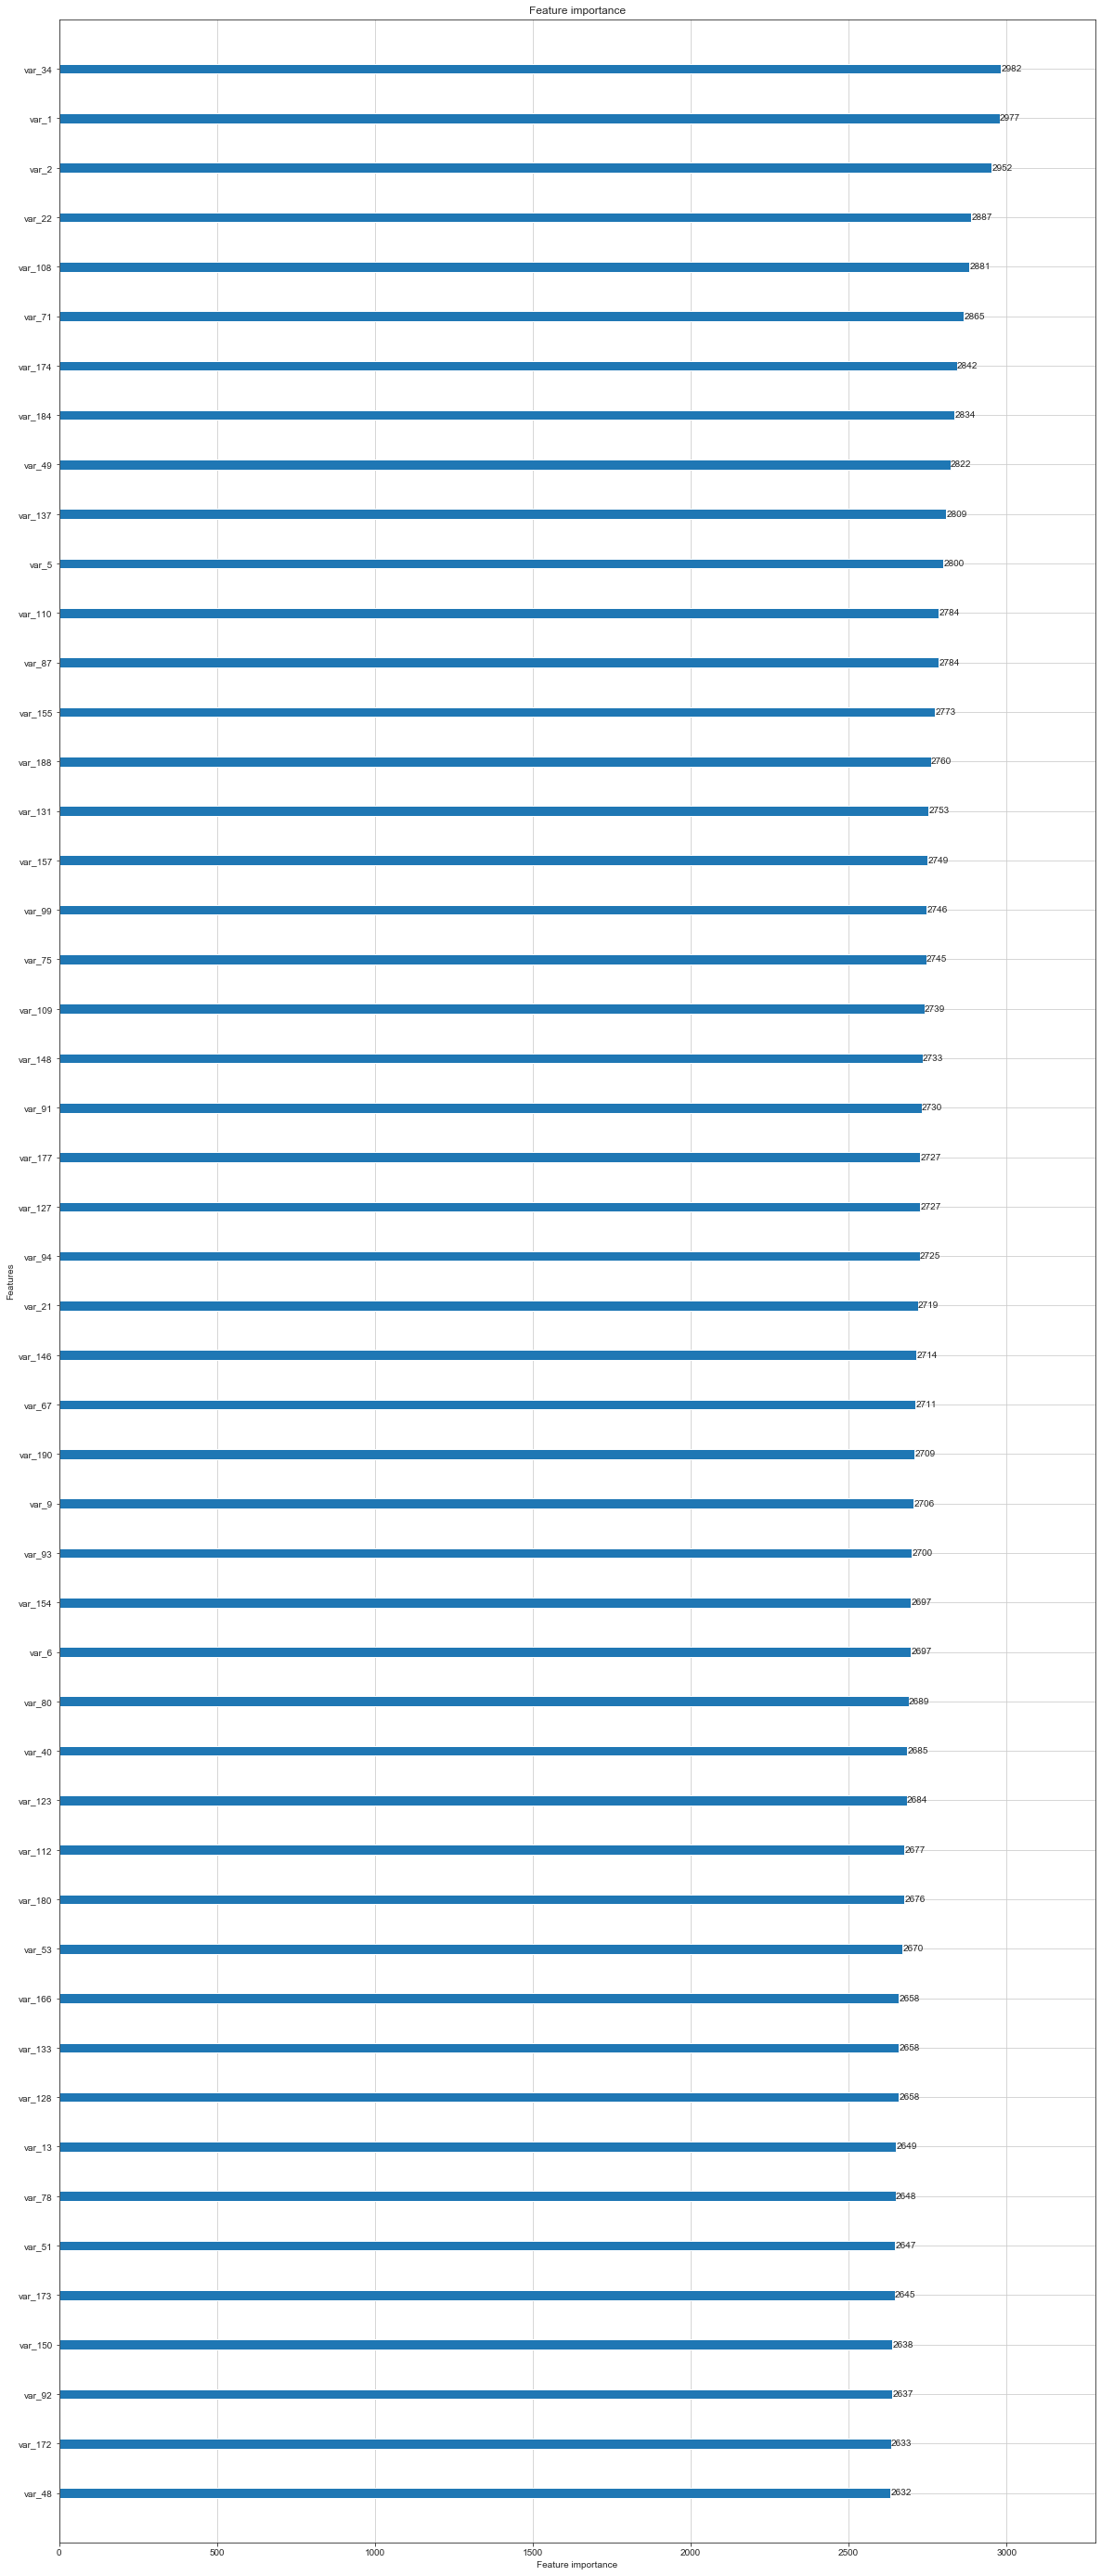

In [87]:
#plot the important features
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [88]:
#final submission
sub_df=pd.DataFrame({'ID_code':test_df['ID_code'].values})
sub_df['lgbm_predict_prob']=lgbm_predict_prob
sub_df['lgbm_predict']=lgbm_predict
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

ID_code  lgbm_predict_prob  lgbm_predict
0  test_0           0.272017             0
1  test_1           0.448776             0
2  test_2           0.165781             0
3  test_3           0.444722             0
4  test_4           0.149394             0